In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import asterion as ast
import arviz as az

ast.style.use("asterion-light")

import numpyro
import numpyro.distributions as dist
import jax.numpy as jnp
numpyro.set_host_device_count(5)

/Users/alyttle/.pyenv/versions/asterion/lib/python3.9/site-packages/jax/_src/lib/__init__.py:33: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
filename = "/Users/alyttle/OneDrive/Data/Asterion/mesa_data.hdf5"
df = pd.read_hdf(filename)
df["log_nu_max"] = np.log10(df["nu_max"])
df.head()

,filename,model_number,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,initial_fov,star_mass,...,E_0_37,E_0_38,E_0_39,E_0_40,tau_he,delta_he,amp_he,tau_cz,dirname,log_nu_max
0,profile4,152.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,0.000002,0.000001,7.889056e-07,6.149682e-07,15247.850269,2037.139686,0.029961,38796.631185,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1,2.204462
1,profile5,153.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,0.000002,0.000001,8.212464e-07,6.273383e-07,14809.891105,1980.528826,0.029540,37900.327592,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1,2.217565
2,profile6,154.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,0.000003,0.000001,8.515127e-07,6.398741e-07,14496.838617,1940.585790,0.029221,37222.634389,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1,2.227690
3,profile7,155.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,0.000003,0.000001,8.790797e-07,6.513090e-07,14220.559706,1878.217087,0.028561,36703.539749,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1,2.235572
4,profile8,156.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,0.000003,0.000001,9.036751e-07,6.612813e-07,14054.932771,1883.449431,0.028860,36302.082709,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1,2.241746


Define a base mask, we will only consider stars in this range:

In [4]:
seed = 0
random_state = np.random.RandomState(seed)

num_samples = 50
mask = (df["star_age"] < 20) & (df["nu_max"] > 25) & (df["frac_age"] > 0.01) & (df["effective_T"] < 7000.0)


sample = df[mask].sample(
    frac=1, random_state=random_state
).sample(
    num_samples, random_state=random_state, weights="log_nu_max"
).reset_index(drop=True)
sample

,filename,model_number,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,initial_fov,star_mass,...,E_0_37,E_0_38,E_0_39,E_0_40,tau_he,delta_he,amp_he,tau_cz,dirname,log_nu_max
0,profile754,902.0,1.0,1.1,0.28,0.004097,-0.5,1.9,0.0,1.100000,...,6.374962e-09,6.853576e-09,7.506893e-09,8.421256e-09,1534.442438,795.437719,-0.001379,1354.270367,m1.1Y0.28FeH-0.5MLT1.9ov0.005000000000000001dif1,3.175834
1,profile655,803.0,1.0,1.2,0.28,0.012800,0.0,2.3,0.0,1.200000,...,1.126873e-08,8.445754e-09,7.669328e-09,7.605628e-09,1050.518944,170.639572,0.023891,2583.688281,m1.2Y0.28FeH0.0MLT2.3ov0.006444444444444444dif0,3.236161
2,profile1207,1820.0,2.0,1.4,0.28,0.038980,0.5,2.1,0.0,1.397725,...,1.169043e-05,8.456426e-05,2.761733e-04,2.276595e-05,62424.047782,9282.928284,0.061085,134563.754051,m1.4Y0.28FeH0.5MLT2.1ov0.009333333333333329dif0,1.525270
3,profile649,797.0,1.0,0.8,0.32,0.036803,0.5,2.3,0.0,0.800000,...,6.137175e-09,7.764732e-09,1.086357e-08,2.252088e-08,642.068116,64.691967,0.006260,2128.600292,m0.8Y0.32FeH0.5MLT2.3ov0.0006666666666666673dif1,3.581314
4,profile745,893.0,1.0,0.8,0.24,0.004324,-0.5,2.3,0.0,0.800000,...,1.343466e-08,1.082942e-08,1.001692e-08,9.950275e-09,900.933807,93.529779,0.005629,2448.073047,m0.8Y0.24FeH-0.5MLT2.3ov0.0006666666666666673dif1,3.408074
5,profile693,841.0,1.0,1.4,0.24,0.041145,0.5,1.9,0.0,1.400000,...,4.010083e-06,6.495391e-08,2.402508e-08,1.622971e-08,1277.617543,194.860825,0.015730,3773.929225,m1.4Y0.24FeH0.5MLT1.9ov0.009333333333333329dif0,3.227351
6,profile815,1014.0,2.0,0.9,0.24,0.013508,0.0,2.3,0.0,0.899651,...,1.653224e-08,1.630960e-08,1.663106e-08,1.746909e-08,1282.427333,141.882001,0.007352,3719.044321,m0.9Y0.24FeH0.0MLT2.3ov0.0021111111111111113dif1,3.262358
7,profile678,826.0,1.0,1.5,0.24,0.013511,0.0,1.9,0.0,1.500000,...,7.938434e-09,7.473621e-09,7.705773e-09,8.118665e-09,1608.958538,878.802816,0.003987,1241.662081,m1.5Y0.24FeH0.0MLT1.9ov0.010777777777777778dif0,3.116744
8,profile597,745.0,1.0,1.2,0.32,0.036814,0.5,1.9,0.0,1.200000,...,6.042187e-08,2.361888e-06,9.095228e-08,2.220263e-08,956.115696,156.012960,0.022558,2863.842315,m1.2Y0.32FeH0.5MLT1.9ov0.006444444444444444dif0,3.317942
9,profile1188,1712.0,2.0,1.4,0.32,0.012089,0.0,2.3,0.0,1.398589,...,2.536896e-06,3.129500e-06,4.561518e-06,9.213700e-06,35253.323936,5322.197718,0.054292,83900.763504,m1.4Y0.32FeH0.0MLT2.3ov0.009333333333333329dif0,1.759532


In [167]:
sample.to_csv("data/results/sample.csv")

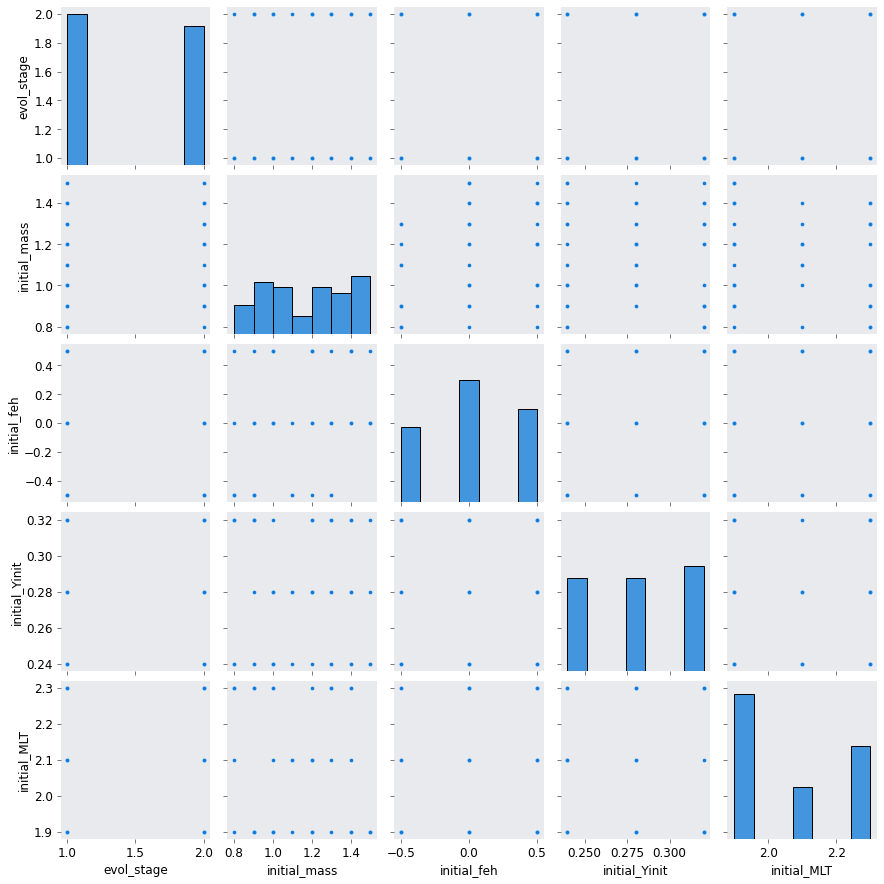

In [5]:
sns.pairplot(
    sample, 
    vars=[
        "evol_stage",
        "initial_mass", 
        "initial_feh", 
        "initial_Yinit", 
        "initial_MLT"
    ]
);

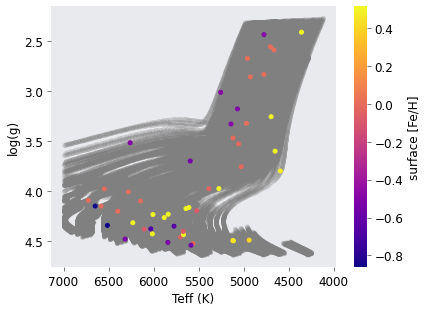

In [6]:
fig, ax = plt.subplots()

ax.scatter(df.loc[mask, "effective_T"], df.loc[mask, "log_g"], color="grey", alpha=0.1)
s = ax.scatter(sample["effective_T"], sample["log_g"], c=sample["star_feh"])

ax.invert_xaxis()
ax.invert_yaxis()

ax.set_xlabel("Teff (K)")
ax.set_ylabel("log(g)")
fig.colorbar(s, label="surface [Fe/H]");

In [7]:
path = "/Volumes/daviesgr-cartography/mesa_grid/grid2p5_zams_rgb_ov/grid_2p5"

In [8]:
import zipfile
import gyraffe
from gyraffe.io import read_mesa_profile

In [2737]:
idx = 49
archive_name = os.path.join(path, sample.loc[idx, "dirname"], "GYRE.zip")

In [2700]:
with zipfile.ZipFile(archive_name, 'r') as archive:
#     print(archive.namelist()[0])
    with archive.open(os.path.join(sample.loc[idx, "dirname"], sample.loc[idx, "filename"] + ".data.GYRE")) as file:
#         for i in range(10):
#             print(file.readline())
        profile = read_mesa_profile(file)

In [2701]:
profile["c"] = gyraffe.sound_speed(profile)
profile["tau"] = gyraffe.acoustic_depth(profile)
profile.head()

,k,r,M_r,L_r,P,T,rho,nabla,N^2,Gamma_1,...,delta,kap,kap kap_T,kap kap_rho,eps_nuc,eps_nuc*eps_T,eps_nuc*eps_rho,Omega_rot,c,tau
0,1,0.000000e+00,0.000000e+00,0.000000e+00,4.655147e+20,2.968594e+07,75820.108835,0.027013,0.000000e+00,1.646249,...,0.103656,0.141391,0.302292,-0.279119,6.210972e-16,1.899090e-14,1.084399e-15,0.000037,1.005361e+08,25627.980066
1,2,8.134788e+06,1.709590e+26,1.382073e+25,4.654642e+20,2.968586e+07,75814.800589,0.027013,1.808805e-07,1.646250,...,0.103662,0.141410,0.302323,-0.279153,6.209680e-16,1.898699e-14,1.084165e-15,0.000037,1.005342e+08,25627.899151
2,3,1.024927e+07,3.419180e+26,2.764124e+25,4.654312e+20,2.968580e+07,75811.336720,0.027014,2.871368e-07,1.646251,...,0.103665,0.141422,0.302344,-0.279175,6.208836e-16,1.898444e-14,1.084011e-15,0.000037,1.005330e+08,25627.878119
3,4,1.291346e+07,6.838360e+26,5.528327e+25,4.653798e+20,2.968571e+07,75805.945114,0.027015,4.558160e-07,1.646252,...,0.103671,0.141441,0.302376,-0.279209,6.207521e-16,1.898047e-14,1.083772e-15,0.000037,1.005311e+08,25627.851618
4,5,1.627030e+07,1.367672e+27,1.105704e+26,4.652985e+20,2.968557e+07,75797.404660,0.027018,7.235980e-07,1.646253,...,0.103680,0.141471,0.302426,-0.279264,6.205439e-16,1.897418e-14,1.083394e-15,0.000037,1.005280e+08,25627.818226


In [2702]:
n = np.arange(1, 41)
nu_cols = [f"nu_0_{i}" for i in n]

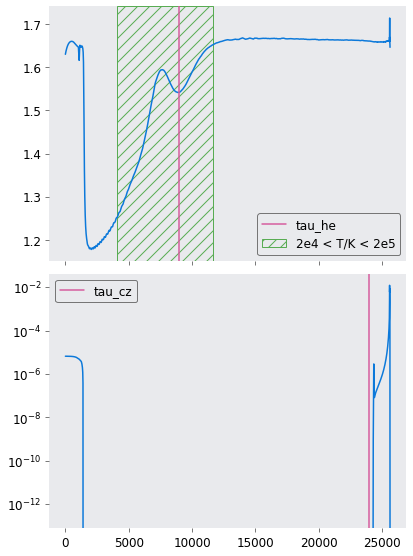

In [2704]:
tau_he = 9000
tau_cz = 24000

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6.4, 9.6),
                               sharex=True, gridspec_kw={"hspace": 0.05})

ax1.plot(profile["tau"], profile["Gamma_1"])
ax1.axvline(tau_he, color="C1", label="tau_he")
ax1.axvspan(
    profile.loc[profile["T"] > 2e4, "tau"].iloc[-1],
    profile.loc[profile["T"] < 2e5, "tau"].iloc[0],
    facecolor="none",
    edgecolor="C2",
    hatch="//",
    label="2e4 < T/K < 2e5"
)
ax1.legend()
# ax1.grid(True)
ax2.plot(profile["tau"], profile["N^2"])
ax2.axvline(tau_cz, color="C1", label="tau_cz")
ax2.set_yscale("log")
ax2.legend();
# ax2.grid(True)

In [2705]:
nu_max = (sample.loc[idx, "nu_max"], 0.05*sample.loc[idx, "nu_max"])
teff = (sample.loc[idx, "effective_T"], 50.0)

In [2706]:
fwhm = 0.6 * nu_max[0]**0.9  # obs modes in this range, Mosser et al. 2010

# best case senario for obs modes
nu_low = nu_max[0] - 1.5 * fwhm
nu_high = nu_max[0] + 1.5 * fwhm

In [2707]:
nu = sample.loc[idx, nu_cols].astype(float)
mask = (nu > nu_low) & (nu < nu_high) & (nu > 0) & (nu < sample.loc[idx, "acoustic_cutoff"])
print(nu[mask])

nu_0_6     139.900442
nu_0_7     158.595361
nu_0_8     177.629541
nu_0_9     196.126871
nu_0_10    214.610149
nu_0_11    233.599533
nu_0_12    252.590519
nu_0_13    271.625358
nu_0_14    290.899643
nu_0_15    310.305835
nu_0_16    329.743506
nu_0_17    349.244792
nu_0_18    368.766739
Name: 49, dtype: float64


In [2708]:
num_orders = np.sum(mask)
central = slice(num_orders//2 - 2, num_orders//2 + 3)

dnu = np.diff(nu[mask][central])
delta_nu = (np.mean(dnu), np.std(dnu, ddof=1))
print(delta_nu)
model = ast.GlitchModel(nu_max, delta_nu, teff=teff)

(19.07237349383363, 0.1362446647028551)


In [2719]:
log_numax = np.log10(nu_max[0])

model.he_glitch.log_a = dist.Normal(-log_numax + 1.0, 0.5)
model.he_glitch.log_b = dist.Normal(-2.0*log_numax + 0.5, 0.5)
model.he_glitch.log_tau = dist.Normal(np.log10(tau_he) - 6, 0.1)

model.cz_glitch.log_a = dist.Normal(2.0*log_numax - 3.0, 0.1)
model.cz_glitch.log_tau = dist.Normal(np.log10(tau_cz) - 6, 0.05)

model.he_glitch.phi = dist.VonMises(0.0, 0.1)
model.cz_glitch.phi = dist.VonMises(0.0, 0.1)

model._kernel_length = 4.0

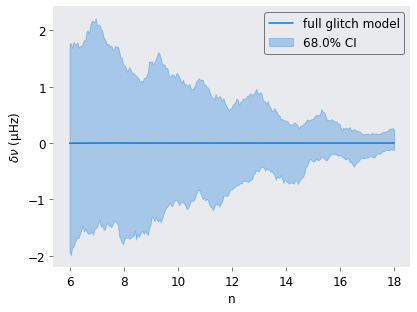

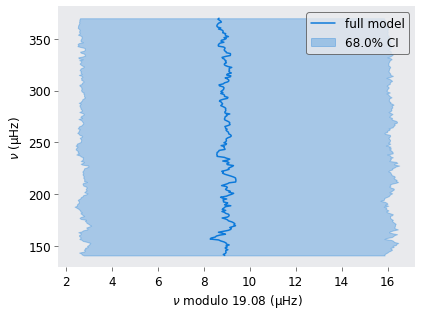

In [2720]:
infer = ast.Inference(model, n=n[mask], nu=nu[mask])
infer.prior_predictive()
prior_data = infer.get_data()

ast.plot_glitch(prior_data, group="prior");
ast.plot_echelle(prior_data, group="prior");

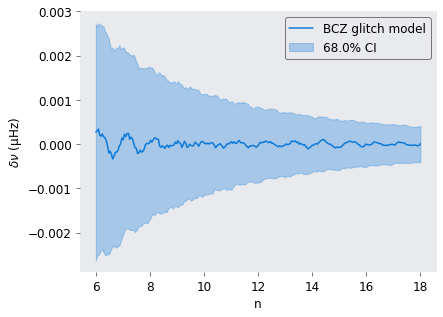

In [2721]:
ast.plot_glitch(prior_data, group="prior", kind="cz");

In [2722]:
infer.sample(method="mcmc", num_chains=5)
infer.posterior_predictive()
data = infer.get_data()

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [2723]:
model.he_glitch.log_tau.mean

DeviceArray(-2.04575749, dtype=float64)

In [2724]:
model.cz_glitch.log_tau.mean

DeviceArray(-1.61978876, dtype=float64)

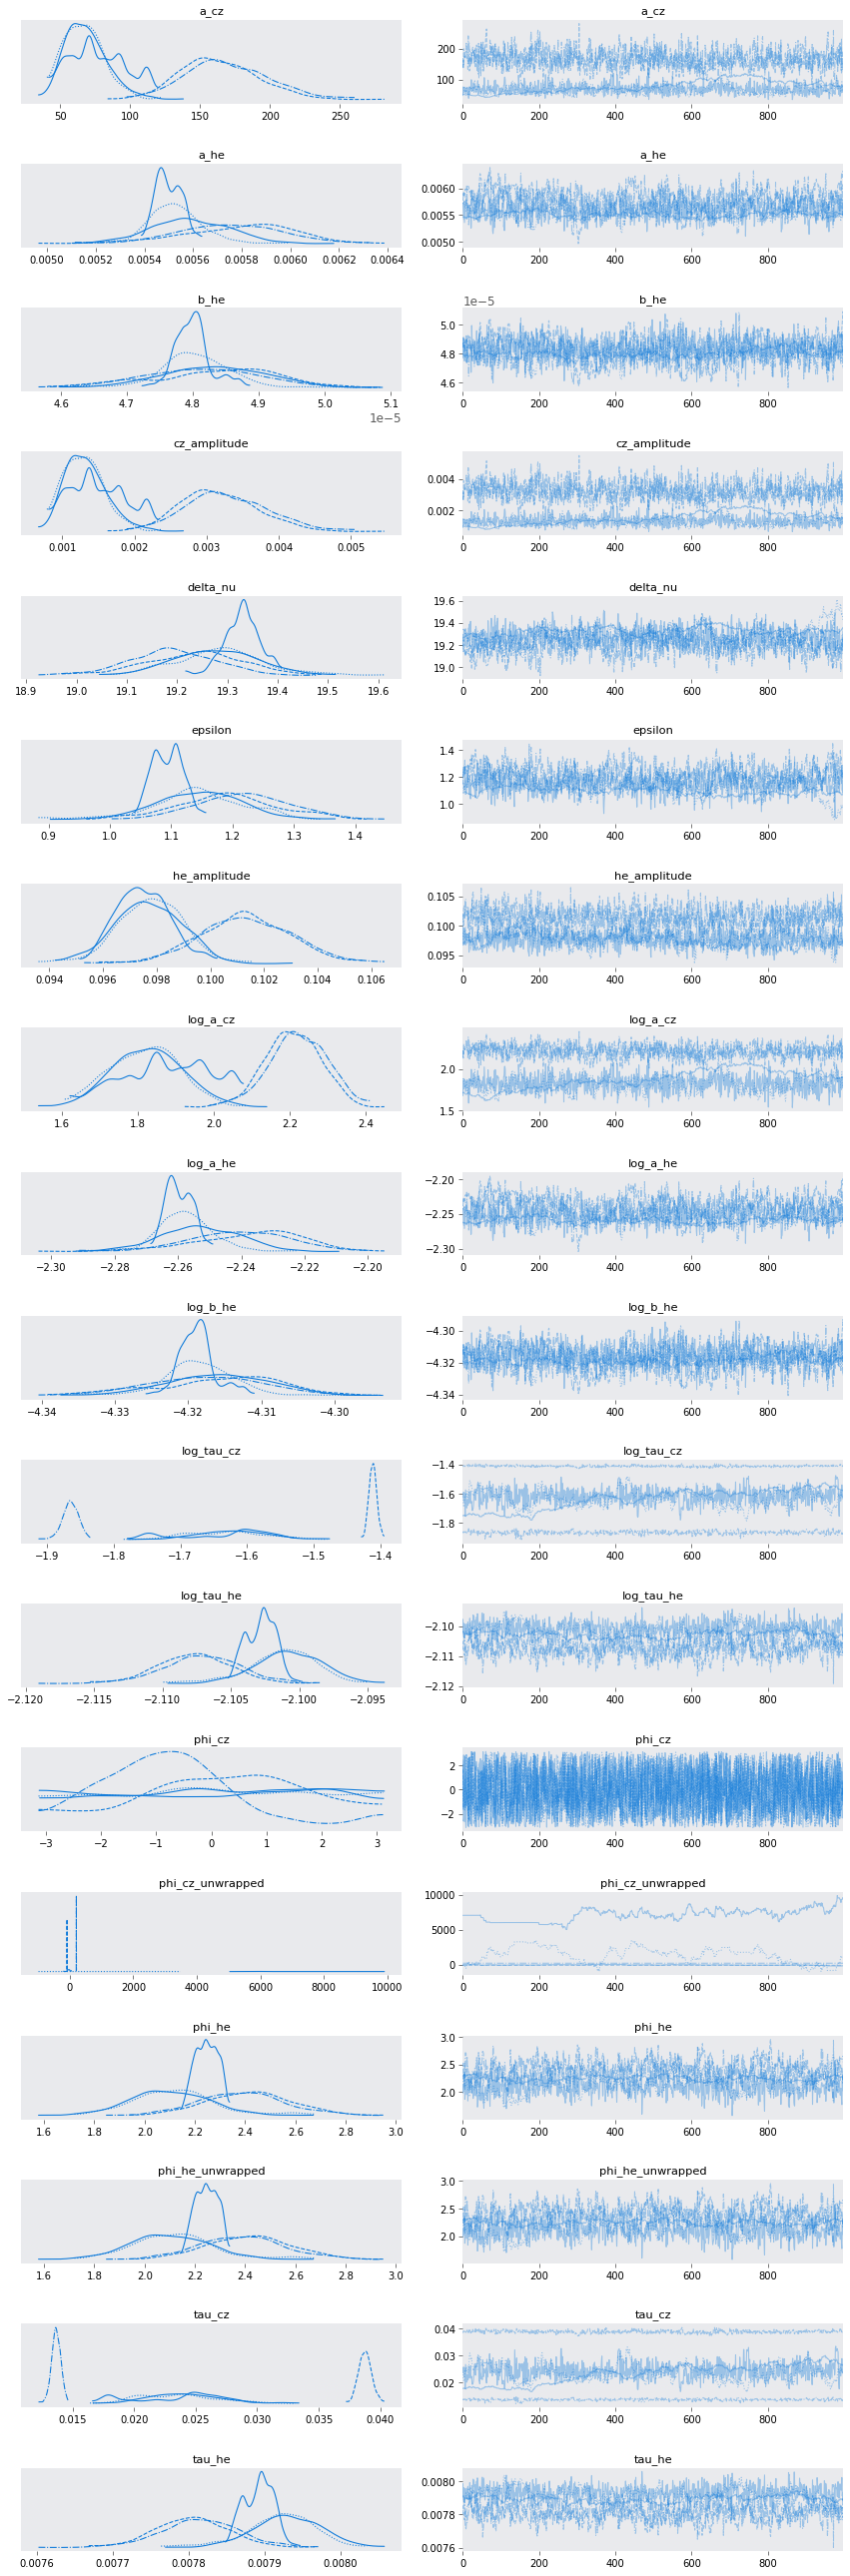

In [2725]:
az.plot_trace(data, var_names=ast.get_var_names(data, dims=()),
             backend_kwargs={"tight_layout": True});

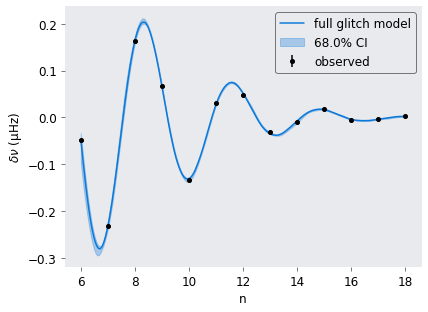

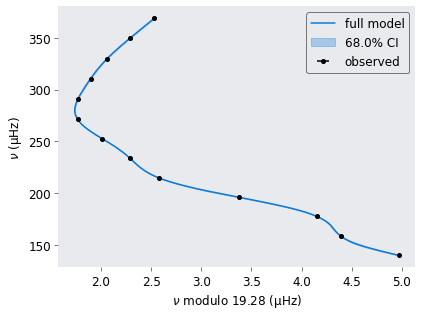

In [2726]:
ast.plot_glitch(data)
ast.plot_echelle(data);

<AxesSubplot:xlabel='n', ylabel='$\\delta\\nu$ ($\\mathrm{\\mu Hz}$)'>

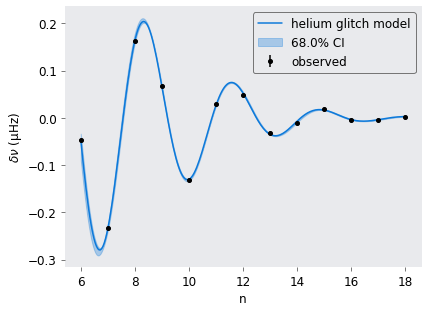

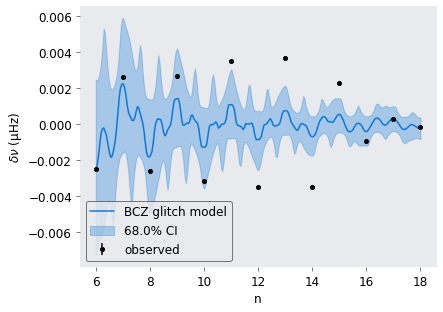

In [2727]:
ast.plot_glitch(data, kind="he")
ast.plot_glitch(data, kind="cz")

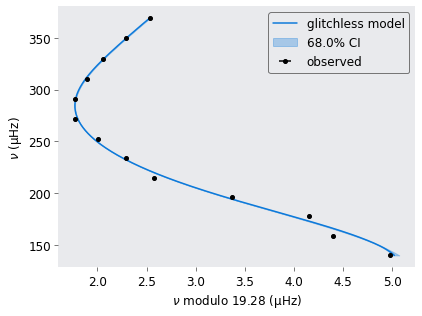

In [2728]:
ast.plot_echelle(data, kind="glitchless");

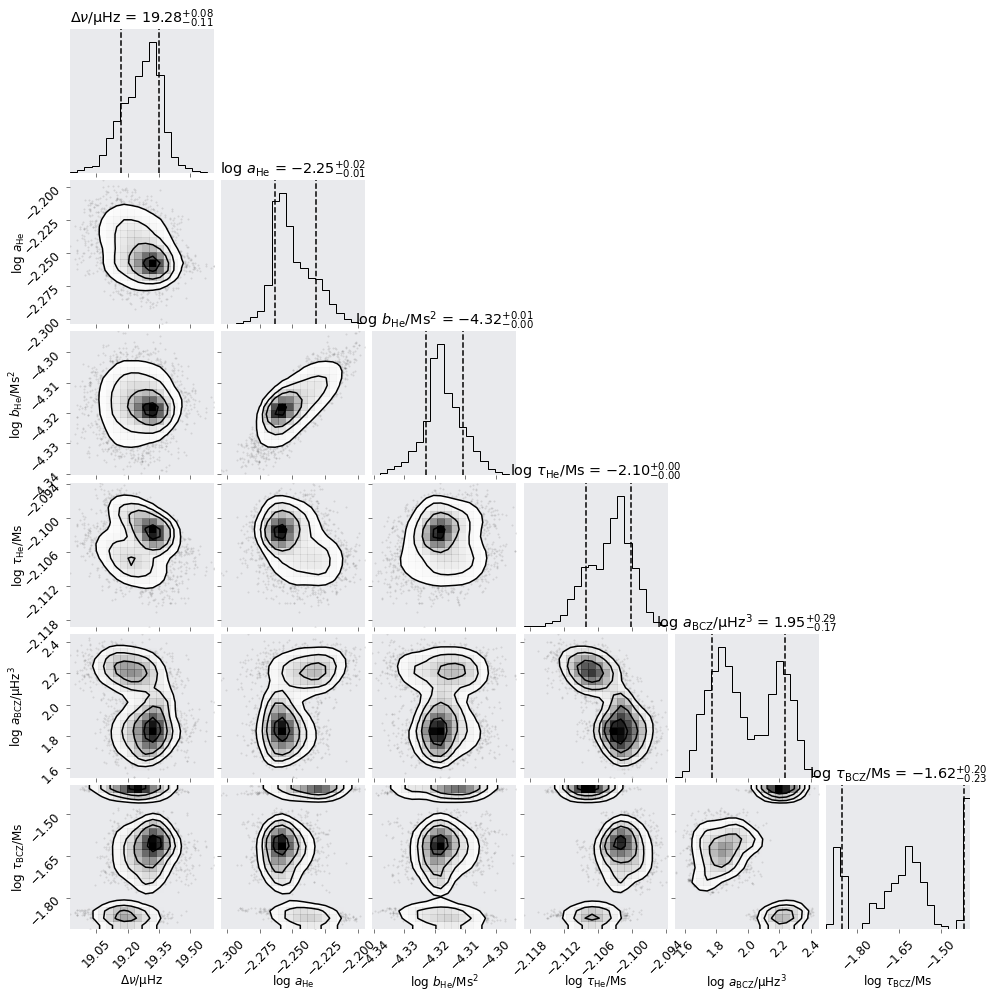

In [2729]:
ast.plot_corner(
    data,
    var_names=["delta_nu", "log_a_he", "log_b_he", "log_tau_he", "log_a_cz", "log_tau_cz"]
);

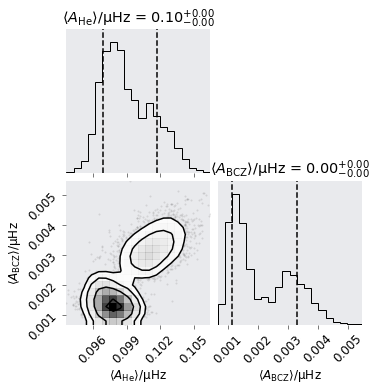

In [2730]:
ast.plot_corner(data, var_names=["he_amplitude", "cz_amplitude"]);

In [2731]:
def he_ionisation_zone(tau, tau_he, gamma_he, delta_he):
    return - gamma_he / np.sqrt(2*np.pi) / delta_he * np.exp(- 0.5 * (tau - tau_he)**2 / delta_he**2)

In [2732]:
gamma_he = 1e6 * (data.posterior["a_he"].values / data.posterior["delta_nu"].values / 2 / np.pi).flatten()
delta_he = 1e6 * (0.5 * np.sqrt(0.5 * data.posterior["b_he"].values) / np.pi).flatten()
tau_he = 1e6 * data.posterior["tau_he"].values.flatten()
tau_cz = 1e6 * data.posterior["tau_cz"].values.flatten()

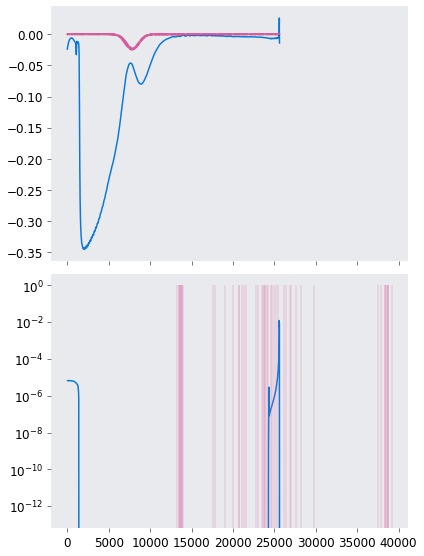

In [2733]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6.4, 9.6),
                               sharex=True, gridspec_kw={"hspace": 0.05})

thin = 100
gamma0 = 1.67
y = he_ionisation_zone(profile["tau"].to_numpy()[:, None], tau_he, gamma_he, delta_he)

ax1.plot(profile["tau"], -2 * (gamma0 - profile["Gamma_1"]) / (gamma0 + profile["Gamma_1"]))
ax1.plot(profile["tau"], y[:, ::thin], color="C1", alpha=0.2);
# ax1.grid(True)
ax2.plot(profile["tau"], profile["N^2"])
ax2.vlines(tau_cz[::thin], 0, 1, color="C1", alpha=0.2)

ax2.set_yscale("log")
# ax2.grid(True)

In [2734]:
table = ast.get_table(
    data, 
    dims=(),
    var_names=[
        'a_cz', 'a_he', 'b_he', 'cz_amplitude', 'delta_nu',
        'epsilon', 'he_amplitude', 'log_a_cz', 'log_a_he',
        'log_b_he', 'log_tau_cz', 'log_tau_he', 'phi_cz',
        'phi_he', 'tau_cz', 'tau_he'
    ],
    kind="diagnostics",
    extend=True,
    round_to="none"
)
table

,a_cz,a_he,b_he,cz_amplitude,delta_nu,epsilon,he_amplitude,log_a_cz,log_a_he,log_b_he,log_tau_cz,log_tau_he,phi_cz,phi_he,tau_cz,tau_he
metric,,,,,,,,,,,,,,,,
mcse_mean,21.257323,0.000054,6.045673e-08,0.000412,0.021845,0.019905,0.000818,0.084832,0.004093,0.000544,0.064989,0.001321,0.119740,0.059507,0.003635,0.000024
mcse_sd,15.835299,0.000039,4.299729e-08,0.000307,0.015695,0.014328,0.000601,0.063450,0.002955,0.000385,0.048709,0.000970,0.084796,0.043231,0.002743,0.000018
ess_bulk,7.211228,16.943712,1.437499e+02,7.211228,19.610063,16.887060,8.686067,7.211228,16.943712,143.749879,6.062956,8.608777,389.961420,10.995929,6.062956,8.608777
ess_tail,87.933533,79.120730,2.995438e+02,87.933533,112.760914,124.279713,83.785010,87.933533,79.120730,299.543835,28.776722,91.069710,4062.024591,75.252901,28.776722,91.069710
r_hat,1.847437,1.211721,1.130783e+00,1.847437,1.190169,1.229193,1.571915,1.847437,1.211721,1.130453,2.486678,1.592818,1.024065,1.386629,2.486678,1.592818
mean,109.390678,0.005632,4.816664e-05,0.002120,19.264028,1.158683,0.099122,1.990342,-2.249616,-4.317305,-1.632907,-2.103900,-0.068428,2.253738,0.024703,0.007873
sd,51.888775,0.000203,7.376806e-07,0.001006,0.094287,0.081420,0.002282,0.205873,0.015505,0.006648,0.150846,0.003779,1.672467,0.198656,0.008418,0.000068
16th,59.070697,0.005452,4.754864e-05,0.001145,19.165490,1.080279,0.096876,1.771372,-2.263430,-4.322862,-1.854452,-2.108119,-1.945634,2.052752,0.013981,0.007796
50th,88.330213,0.005577,4.809744e-05,0.001712,19.275509,1.149125,0.098622,1.946109,-2.253601,-4.317878,-1.621077,-2.103315,-0.167067,2.245522,0.023929,0.007883


In [2735]:
var_names = ["log_a_he", "log_b_he", "log_tau_he", "phi_he", "log_a_cz", "log_tau_cz", "phi_cz",
             "delta_nu", "epsilon", "he_amplitude", "cz_amplitude"]

data.posterior[var_names].to_dataframe().to_csv(f"data/results/{idx}.csv")